# Update

ULR

# Overview

Things to do with the ranked reconstruction errors:

    - TF-Enrichment
    - Correlation-Analysis
    - PPI-Enrichment
    - Outlook

# TF-Enrichment

In the following section all data, prior to fitting, was filtered so
that only genes existing in STRINGdb would remain.

## With Pan-Cancer data

`https://gdc.cancer.gov/about-data/publications/pancanatlas`
EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv

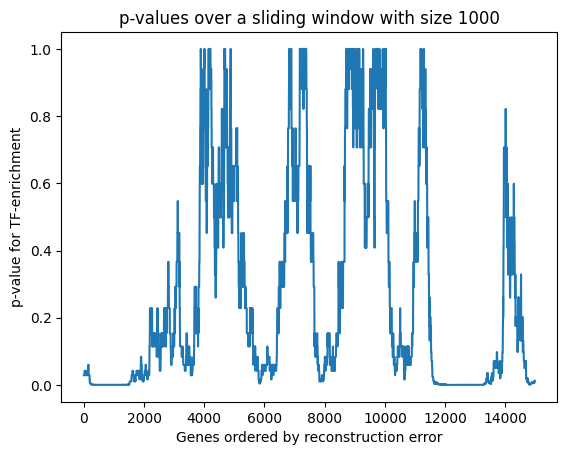

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
from evaluation_methods.enrich_plot_over_gene_list import *
recons_pancan = pd.read_csv("pancan_recons_total_string_filtered.csv")
enr_pancan = Enricher(recons_pancan["name"], window_size=1000)
enr_pancan.enr_plot()
pancan = enr_pancan.elist
plt.clf()

## And with the GTEx-Data

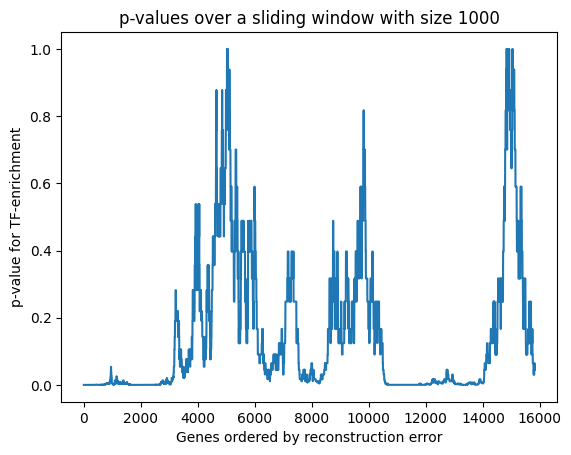

In [5]:
recons_gtex = pd.read_csv("recons/GTEx_filtereded_with_genes_in_string.csv")
enr_gtex = Enricher(recons_gtex["x"], window_size=1000)
enr_gtex.enr_plot()

## And lets have a look at an overlay:

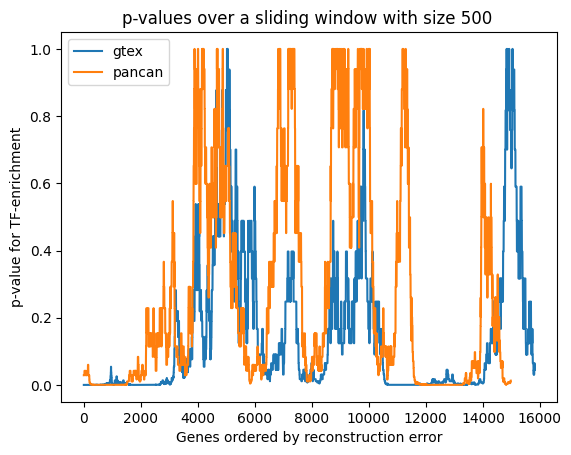

In [6]:
gtex = enr_gtex.elist
plt.plot(gtex, label="gtex")
plt.plot(pancan, label="pancan")
plt.ylabel("p-value for TF-enrichment")
plt.xlabel("Genes ordered by reconstruction error")
plt.title("p-values over a sliding window with size 500 ")
plt.legend()
plt.show()

# Correlation Analysis

## Extraction of TF-enriched regions:

### For the PanCan data:

/tmp/ipykernel_52346/2660272594.py:34: RuntimeWarning: invalid value encountered in divide
  normd = count/alls


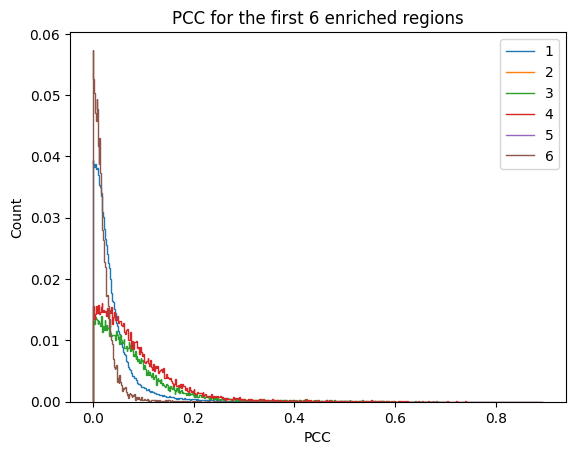

<Figure size 640x480 with 0 Axes>

In [15]:
import numpy as np
from evaluation_methods.pcc_over_exp_sets import *
eeli = pancan + [1] * 999
recons_pancan["enr_conf"] = eeli
richard = recons_pancan[recons_pancan["enr_conf"] <= recons_pancan["enr_conf"].min()+.1 ]
richs_pancan = []
for idx in range(0, len(richard)):
    if idx == 0:
        sublist = []
        sublist.append(richard.index[idx])
    if (richard.index[idx] - richard.index[idx-1]) < 10:
        sublist.append(richard["name"].iloc[idx])
    else:
        sublist.append(richard["name"].iloc[idx])
        richs_pancan.append(sublist)
        sublist = []

in_string = pd.read_csv("h_S_string.txt", sep="\t")

data = pd.read_csv("data/EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.csv")
fdat = data.loc[data["gene_id"].isin(in_string["preferred_name"])]
tdat = fdat.transpose()
tarry = np.array(tdat)
exp = pd.DataFrame(data = tarry[2:, :], columns=tarry[1,:])

pccs = []
for list in richs_pancan[0:5]:
    pccs.append(pcc_calculator(exp, tf_extractor(list)))

cnt = 1
for table in pccs:
    count, bins = np.histogram(table["confidence"].dropna(), bins=500)
    alls = sum(count)
    normd = count/alls
    plt.stairs(normd, bins, label=str(cnt))
    cnt+=1
plt.legend()
plt.xlabel('PCC')
plt.ylabel('Count')
plt.title('PCC for the first 5 enriched regions')
plt.show()
plt.clf()

## And for the GTEx data

(31993, 17383)


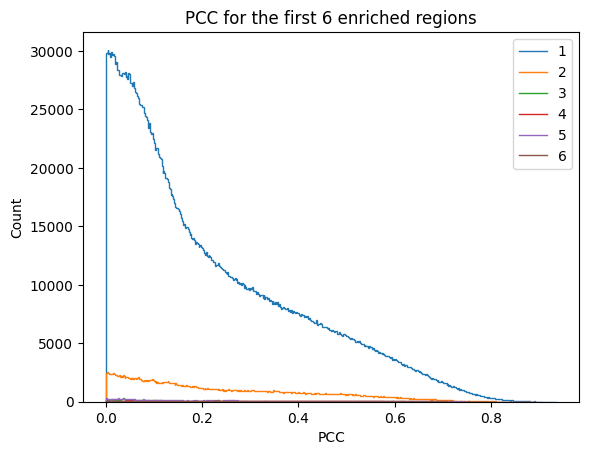

In [16]:
eeli = gtex + [1] * 999
recons_gtex["enr_conf"] = eeli
richard = recons_gtex[recons_gtex["enr_conf"] <= recons_gtex["enr_conf"].min()+.1 ]
richs_gtex = []
for idx in range(0, len(richard)):
    if idx == 0:
        sublist = []
        sublist.append(richard.index[idx])
    if (richard.index[idx] - richard.index[idx-1]) < 10:
        sublist.append(richard["x"].iloc[idx])
    else:
        sublist.append(richard["x"].iloc[idx])
        richs_gtex.append(sublist)
        sublist = []

data = pd.read_hdf("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.h5", key = "data")
data = data.drop(data[data.iloc[:, 2:].sum(axis=1) < 35425].index)
print(data.shape)
in_string = pd.read_csv("h_S_string.txt", sep="\t")["preferred_name"]
fdat = data.loc[data["Description"].isin(in_string)]
fdat = fdat.transpose()
tarry = np.array(fdat)
exp = pd.DataFrame(data = tarry[1:, :], columns=tarry[0,:])

pccs = []
for list in richs_gtex[0:6]:
    pccs.append(pcc_calculator(exp, tf_extractor(list)))

cnt = 1
for table in pccs:
    count, bins = np.histogram(table["confidence"].dropna(), bins=500)
    alls = sum(count)
    normd = count/alls
    plt.stairs(normd, bins, label=str(cnt))
    cnt+=1
plt.legend()
plt.xlabel('PCC')
plt.ylabel('Count')
plt.title('PCC for the first 6 enriched regions')
plt.show()

In [95]:
for item in range(len(richs_gtex)):
    pd.DataFrame(richs_gtex[item]).to_csv("".join(("enriched_regions/gtex_part_", str(item),".csv")))

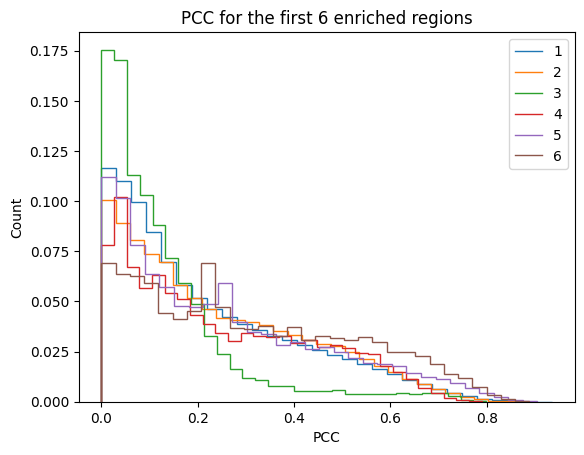

In [21]:
cnt = 1
for table in pccs:
    count, bins = np.histogram(table["confidence"].dropna(), bins=30)
    alls = sum(count)
    normd = count/alls
    plt.stairs(normd, bins, label=str(cnt))
    cnt+=1
plt.legend()
plt.xlabel('PCC')
plt.ylabel('Count')
plt.title('PCC for the first 6 enriched regions')
plt.show()

# PPI-enrichment:

## For the PanCan-Data:

In [66]:
import stringdb
ext_gene_lists = []
for list in richs_pancan:
    g_list = pd.DataFrame(list)
    genes = g_list[0].astype("str")
    ext_gene_lists.append(genes)

In [ ]:
for item in range(len(richs_pancan)):
    pd.DataFrame(richs_[item]).to_csv("".join(("enriched_regions/pancan_part_", str(item),".csv")))

In [52]:
stringdb.get_ppi_enrichment(ext_gene_lists[0][0:2000])

number_of_nodes  number_of_edges  average_node_degree   
0             2000            53899                 53.9  \

   local_clustering_coefficient  expected_number_of_edges  p_value  
0                         0.311                     34939      0.0

In [59]:
ppi_enr_list = []
pancan_enr_list = []
for item in range(0, 5):
    genes = ext_gene_lists[item]
    string_ids = stringdb.get_string_ids(genes[0:1000])
    ppi_enr_list.append(stringdb.get_ppi_enrichment(genes[0:2000]))
    pancan_enr_list.append(stringdb.get_enrichment(genes[0:2000]))

In [60]:
pd.concat(ppi_enr_list, ignore_index=True)

number_of_nodes  number_of_edges  average_node_degree   
0             2000            53899                53.90  \
1              378              660                 3.49   
2               23                3                 0.26   
3                7                1                 0.29   
4               47                6                 0.26   

   local_clustering_coefficient  expected_number_of_edges       p_value  
0                         0.311                     34939  0.000000e+00  
1                         0.307                       493  5.360000e-13  
2                         0.261                         1  8.820000e-02  
3                         0.286                         0  6.790000e-02  
4                         0.170                         7  7.123000e-01

Now lets have a closer look at some of these regions, the first one is first:

In [61]:
# to print whole frames:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pancan_enr_list[0][["category", "term", "number_of_genes", "number_of_genes_in_background", "ncbiTaxonId", "p_value", "fdr", "description"]]

category           term  number_of_genes   
0          COMPARTMENTS   GOCC:0005622             1765  \
1          COMPARTMENTS   GOCC:0043226             1613   
2          COMPARTMENTS   GOCC:0043229             1556   
3          COMPARTMENTS   GOCC:0005737             1395   
4          COMPARTMENTS   GOCC:0043227             1462   
5          COMPARTMENTS   GOCC:0043231             1314   
6          COMPARTMENTS   GOCC:0110165             1838   
7          COMPARTMENTS   GOCC:0005829              732   
8          COMPARTMENTS   GOCC:0032991              966   
9          COMPARTMENTS   GOCC:0043233              606   
10         COMPARTMENTS   GOCC:0070013              605   
11         COMPARTMENTS   GOCC:0005634              833   
12         COMPARTMENTS   GOCC:0043228              630   
13         COMPARTMENTS   GOCC:0043232              628   
14         COMPARTMENTS   GOCC:0031982              455   
15         COMPARTMENTS   GOCC:0012505              588   
16         COMPARTMENTS   GOCC:0031090              453   
17         COMPARTMENTS   GOCC:0031981              391   
18         COMPARTMENTS   GOCC:1990904              189   
19         COMPARTMENTS   GOCC:0005925              120   
20         COMPARTMENTS   GOCC:0030055              121   
21         COMPARTMENTS   GOCC:0005654              271   
22         COMPARTMENTS   GOCC:0031410              358   
23         COMPARTMENTS   GOCC:0022626               74   
24         COMPARTMENTS   GOCC:0070062              139   
25         COMPARTMENTS   GOCC:0043230              150   
26         COMPARTMENTS   GOCC:0098805              275   
27         COMPARTMENTS   GOCC:1903561              148   
28         COMPARTMENTS   GOCC:0098588              299   
29         COMPARTMENTS   GOCC:1902494              318   
30         COMPARTMENTS   GOCC:0070161              157   
31         COMPARTMENTS   GOCC:0005840               84   
32         COMPARTMENTS   GOCC:0044391               75   
33         COMPARTMENTS   GOCC:0022625               45   
34         COMPARTMENTS   GOCC:0030141              168   
35         COMPARTMENTS   GOCC:0005856              285   
36         COMPARTMENTS   GOCC:0099080              175   
37         COMPARTMENTS   GOCC:0099503              177   
38         COMPARTMENTS   GOCC:0005783              180   
39         COMPARTMENTS   GOCC:0005773              147   
40         COMPARTMENTS   GOCC:0005615              201   
41         COMPARTMENTS   GOCC:0030054              208   
42         COMPARTMENTS   GOCC:0016604              106   
43         COMPARTMENTS   GOCC:0015629              102   
44         COMPARTMENTS   GOCC:1904813               56   
45         COMPARTMENTS   GOCC:0016607               69   
46         COMPARTMENTS   GOCC:0000323              129   
47         COMPARTMENTS   GOCC:0042175              127   
48         COMPARTMENTS   GOCC:0031967              165   
49         COMPARTMENTS   GOCC:0005764              128   
50         COMPARTMENTS   GOCC:0005789              123   
51         COMPARTMENTS   GOCC:0031975              166   
52         COMPARTMENTS   GOCC:0005694              179   
53         COMPARTMENTS   GOCC:0098796              235   
54         COMPARTMENTS   GOCC:0005768              142   
55         COMPARTMENTS   GOCC:0022627               29   
56         COMPARTMENTS   GOCC:0005844               34   
57         COMPARTMENTS   GOCC:0010008               87   
58         COMPARTMENTS   GOCC:0015934               46   
59         COMPARTMENTS   GOCC:0005794              171   
60         COMPARTMENTS   GOCC:0042788               25   
61         COMPARTMENTS   GOCC:0012506              118   
62         COMPARTMENTS   GOCC:0000785              102   
63         COMPARTMENTS   GOCC:0035770               59   
64         COMPARTMENTS   GOCC:0030659              115   
65         COMPARTMENTS   GOCC:0016020              729   
66         COMPARTMENTS   GOCC:0005774               79   
67 

Or the region 3:

In [88]:
pancan_enr_list[3][["category", "term", "number_of_genes", "number_of_genes_in_background", "ncbiTaxonId", "p_value", "fdr", "description"]]

category           term  number_of_genes   
0    COMPARTMENTS   GOCC:0005634               29  \
1    COMPARTMENTS   GOCC:0031981               19   
2    COMPARTMENTS   GOCC:0005654               14   
3    COMPARTMENTS   GOCC:0043229               30   
4    COMPARTMENTS   GOCC:0005622               31   
5    COMPARTMENTS   GOCC:0005730                7   
6    COMPARTMENTS   GOCC:1902562                3   
7    COMPARTMENTS   GOCC:0000785                6   
8    COMPARTMENTS   GOCC:0005671                2   
9    COMPARTMENTS   GOCC:0043232               14   
10   COMPARTMENTS   GOCC:0110165               31   
11   COMPARTMENTS   GOCC:0016604                5   
12        Process     GO:0006357               26   
13        Process     GO:0006355               29   
14        Process     GO:0031326               30   
15        Process     GO:1903508               23   
16        Process     GO:0031328               24   
17        Process     GO:0051171               32   
18        Process     GO:0045893               22   
19        Process     GO:0080090               32   
20        Process     GO:0031323               32   
21        Process     GO:0060255               32   
22        Process     GO:0051173               26   
23        Process     GO:0045944               19   
24        Process     GO:0031325               26   
25        Process     GO:0045934               20   
26        Process     GO:1903507               19   
27        Process     GO:0051172               23   
28        Process     GO:0010604               26   
29        Process     GO:0031324               23   
30        Process     GO:0045892               18   
31        Process     GO:0000122               16   
32        Process     GO:0010605               23   
33        Process     GO:0065009               27   
34        Process     GO:0048522               28   
35        Process     GO:0048519               27   
36        Process     GO:0048523               26   
37        Process     GO:0006325                9   
38        Process     GO:0016569                7   
39        Process     GO:0009314                7   
40        Process     GO:0051276               10   
41        Process     GO:0016043               21   
42        Process     GO:0048710                3   
43        Process     GO:0016570                6   
44        Process     GO:0032870                7   
45        Process     GO:0048856               20   
46        Process     GO:0007399               13   
47        Process     GO:0043401                4   
48        Process     GO:0042692                5   
49        Process     GO:0007275               19   
50        Process     GO:0051239               15   
51        Process     GO:0032355                4   
52        Process     GO:0010212                4   
53        Process     GO:0061061                6   
54        Process     GO:0045595               11   
55        Process     GO:0006996               15   
56        Process     GO:0030522                4   
57        Process     GO:0048731               17   
58        Process     GO:0044260               18   
59        Process     GO:0022607               12   
60        Process     GO:0071407                6   
61        Process     GO:0002903                2   
62        Process     GO:0048711                2   
63        Process     GO:0048513               14   
64        Process     GO:0006974                7   
65        Process     GO:0045786                6   
66        Process     GO:0030154               15   
67        Process     GO:1902275                4   
68      Component     GO:0005654               28   
69      Component     GO:0031981               29   
70      Component     GO:0005634               32   
71      Component     GO:0000228               15   
72      Component     GO:0000790               14   
73      Component     GO:0005694               16   
74      Component     GO:0042025  

And the fith region:

In [68]:
pancan_enr_list[4][["category", "term", "number_of_genes", "number_of_genes_in_background", "ncbiTaxonId", "p_value", "fdr", "description"]]

category          term  number_of_genes   
0    COMPARTMENTS  GOCC:0005622              613  \
1    COMPARTMENTS  GOCC:0043227              523   
2    COMPARTMENTS  GOCC:0043226              556   
3    COMPARTMENTS  GOCC:0043231              463   
4    COMPARTMENTS  GOCC:0043229              528   
5    COMPARTMENTS  GOCC:0110165              652   
6    COMPARTMENTS  GOCC:0005634              299   
7    COMPARTMENTS  GOCC:0005737              433   
8    COMPARTMENTS  GOCC:0005829              199   
9    COMPARTMENTS  GOCC:0070013              192   
10   COMPARTMENTS  GOCC:0032991              290   
11   COMPARTMENTS  GOCC:0031981              128   
12   COMPARTMENTS  GOCC:0031090              143   
13   COMPARTMENTS  GOCC:0012505              179   
14   COMPARTMENTS  GOCC:1902494              107   
15   COMPARTMENTS  GOCC:0005654               80   
16   COMPARTMENTS  GOCC:0005730               50   
17   COMPARTMENTS  GOCC:0000790               20   
18   COMPARTMENTS  GOCC:0043228              172   
19   COMPARTMENTS  GOCC:0005739               77   
20   COMPARTMENTS  GOCC:0005759               35   
21   COMPARTMENTS  GOCC:0043232              171   
22   COMPARTMENTS  GOCC:0098798               30   
23   COMPARTMENTS  GOCC:0031967               58   
24   COMPARTMENTS  GOCC:0005773               48   
25   COMPARTMENTS  GOCC:0098588               88   
26   COMPARTMENTS  GOCC:0000785               37   
27   COMPARTMENTS  GOCC:1990234               59   
28   COMPARTMENTS  GOCC:0005694               61   
29   COMPARTMENTS  GOCC:0005794               61   
30   COMPARTMENTS  GOCC:0031982              115   
31   COMPARTMENTS  GOCC:0005764               42   
32   COMPARTMENTS  GOCC:0005768               48   
33   COMPARTMENTS  GOCC:0005774               28   
34   COMPARTMENTS  GOCC:0005765               25   
35   COMPARTMENTS  GOCC:0098805               75   
36   COMPARTMENTS  GOCC:0070603               13   
37   COMPARTMENTS  GOCC:0005635               27   
38   COMPARTMENTS  GOCC:0031410               96   
39   COMPARTMENTS  GOCC:0000228               27   
40   COMPARTMENTS  GOCC:1904949               14   
41   COMPARTMENTS  GOCC:0016580                5   
42   COMPARTMENTS  GOCC:1990904               40   
43   COMPARTMENTS  GOCC:0031965               18   
44   COMPARTMENTS  GOCC:0000118               10   
45   COMPARTMENTS  GOCC:0030684               10   
46   COMPARTMENTS  GOCC:0000151               22   
47   COMPARTMENTS  GOCC:0010008               26   
48   COMPARTMENTS  GOCC:0061695               25   
49   COMPARTMENTS  GOCC:0005761               11   
50   COMPARTMENTS  GOCC:0005769               21   
51   COMPARTMENTS  GOCC:0005770               18   
52   COMPARTMENTS  GOCC:0005643                9   
53        Process    GO:0044237              414   
54        Process    GO:0008152              434   
55        Process    GO:0006996              227   
56        Process    GO:0009987              659   
57        Process    GO:0071840              322   
58        Process    GO:0006807              368   
59        Process    GO:0044238              387   
60        Process    GO:0071704              402   
61        Process    GO:0016043              305   
62        Process    GO:0044260              279   
63        Process    GO:0044267              222   
64        Process    GO:1901564              289   
65        Process    GO:0006464              189   
66        Process    GO:0043170              321   
67        Process    GO:0019222              352   
68        Process    GO:0043412              196   
69        Process    GO:0051254              123   
70        Process    GO:0019538              237   
71        Process    GO:0048522              293   
72        Process    GO:0048518              314   
73        Process    GO:1903508              117   
74        Process    GO:0010557              128   
75        Process    GO:0045935              129   
76   

In [69]:
pancan_enr_list[5][["category", "term", "number_of_genes", "number_of_genes_in_background", "ncbiTaxonId", "p_value", "fdr", "description"]]

category          term  number_of_genes   
0   COMPARTMENTS  GOCC:0005622               92  \
1   COMPARTMENTS  GOCC:0043231               74   
2   COMPARTMENTS  GOCC:0043226               84   
3   COMPARTMENTS  GOCC:0043227               78   
4   COMPARTMENTS  GOCC:0043229               81   
5   COMPARTMENTS  GOCC:0005737               71   
6   COMPARTMENTS  GOCC:0110165               97   
7   COMPARTMENTS  GOCC:0012505               38   
8   COMPARTMENTS  GOCC:0005634               46   
9   COMPARTMENTS  GOCC:0005783               15   
10       Process    GO:0044238               72   
11       Process    GO:0071704               74   
12       Process    GO:0044237               72   
13       Process    GO:0008152               76   
14       Process    GO:0044260               56   
15       Process    GO:0043170               63   
16       Process    GO:0006807               67   
17       Process    GO:0044267               42   
18       Process    GO:0009987              100   
19       Process    GO:0006464               36   
20       Process    GO:0043412               37   
21       Process    GO:0019538               43   
22       Process    GO:0048522               51   
23       Process    GO:1901564               49   
24       Process    GO:1903827               13   
25       Process    GO:0051128               29   
26       Process    GO:0010467               26   
27       Process    GO:0046824                5   
28       Process    GO:0033554               23   
29       Process    GO:0031331               10   
30       Process    GO:0090316                7   
31     Component    GO:0043227               92   
32     Component    GO:0043231               84   
33     Component    GO:0043226               94   
34     Component    GO:0005737               84   
35     Component    GO:0005622               96   
36     Component    GO:0005829               49   
37     Component    GO:0032991               47   
38     Component    GO:0043229               87   
39     Component    GO:0012505               43   
40     Component    GO:0031090               36   
41     Component    GO:0005634               58   
42     Component    GO:0031981               42   
43       TISSUES   BTO:0001489               99   
44       TISSUES   BTO:0000083               65   
45       TISSUES   BTO:0000042              104   
46       TISSUES   BTO:0000282               66   
47       TISSUES   BTO:0003091               68   
48       TISSUES   BTO:0000522               67   
49       TISSUES   BTO:0000142               57   
50       TISSUES   BTO:0001484               58   
51       TISSUES   BTO:0001488               59   
52       TISSUES   BTO:0003099               35   
53       TISSUES   BTO:0001491               52   
54       TISSUES   BTO:0000449               22   
55       TISSUES   BTO:0001078               21   
56       TISSUES   BTO:0000174               28   
57       TISSUES   BTO:0001424               15   
58       Keyword       KW-0007               42   
59       Keyword       KW-0597               72   
60       Keyword       KW-0025               76   
61       Keyword       KW-0053               11   
62       Keyword       KW-0653               12   
63  WikiPathways        WP3888               11   

    number_of_genes_in_background  ncbiTaxonId       p_value           fdr   
0                           11202         9606  5.180000e-11  1.140000e-07  \
1                            7476         9606  4.940000e-11  1.140000e-07   
2                            9848         9606  8.490000e-10  6.530000e-07   
3                            8685         9606  1.140000e-09  6.530000e-07   
4                            9242         9606  9.090000e-10  6.530000e-07   
5                            7871         9606  2.630000e-08  1.010000e-05   
6                           13853         9606  1.950000e-07  6.440000e-05   
7                            3080         9606  3.830000e-07  1.1000

In [72]:
pancan_enr_list[10][["category", "term", "number_of_genes", "number_of_genes_in_background", "ncbiTaxonId", "p_value", "fdr", "description"]]

category          term  number_of_genes   
0   COMPARTMENTS  GOCC:0005622               81  \
1   COMPARTMENTS  GOCC:0005737               67   
2   COMPARTMENTS  GOCC:0043226               71   
3   COMPARTMENTS  GOCC:0043227               64   
4   COMPARTMENTS  GOCC:0043229               66   
5   COMPARTMENTS  GOCC:0043231               58   
6   COMPARTMENTS  GOCC:0110165               81   
7   COMPARTMENTS  GOCC:0005829               32   
8   COMPARTMENTS  GOCC:0032991               43   
9   COMPARTMENTS  GOCC:0005634               39   
10  COMPARTMENTS  GOCC:0005791                4   
11  COMPARTMENTS  GOCC:0030867                3   
12  COMPARTMENTS  GOCC:0031090               22   
13  COMPARTMENTS  GOCC:0098888                2   
14  COMPARTMENTS  GOCC:1903561                9   
15  COMPARTMENTS  GOCC:0070062                8   
16  COMPARTMENTS  GOCC:0012505               27   
17  COMPARTMENTS  GOCC:0005783               12   
18  COMPARTMENTS  GOCC:0005615               13   
19       Process    GO:0006397               11   
20       Process    GO:0010605               30   
21       Process    GO:0031324               27   
22       Process    GO:0050684                7   
23       Process    GO:0051172               27   
24       Process    GO:1903311               10   
25       Process    GO:0006396               14   
26     Component    GO:0070062               31   
27     Component    GO:0005622               84   
28     Component    GO:0031982               41   
29     Component    GO:0043227               78   
30     Component    GO:0043226               81   
31     Component    GO:0032991               46   
32     Component    GO:0005615               35   
33     Component    GO:0005737               73   
34     Component    GO:0043231               70   
35     Component    GO:0043229               76   
36     Component    GO:0005829               42   
37     Component    GO:0012505               38   
38     Component    GO:0005634               51   
39      Function    GO:0003723               26   
40      Function    GO:0005515               52   
41      Function    GO:0019899               25   
42      Function    GO:0045296                9   
43      Function    GO:0019903                6   
44       TISSUES   BTO:0000345               55   
45       TISSUES   BTO:0001488               73   
46       TISSUES   BTO:0000522               74   
47       TISSUES   BTO:0000083               70   
48       TISSUES   BTO:0000081               71   
49       TISSUES   BTO:0001491               65   
50       TISSUES   BTO:0003091               73   
51       TISSUES   BTO:0001484               63   
52       TISSUES   BTO:0000142               61   
53       TISSUES   BTO:0000759               37   
54       TISSUES   BTO:0000282               64   
55       TISSUES   BTO:0001489               85   
56       TISSUES   BTO:0003099               38   
57       TISSUES   BTO:0000174               32   
58       TISSUES   BTO:0000570               35   
59       TISSUES   BTO:0000254               36   
60       TISSUES   BTO:0000080               34   
61       TISSUES   BTO:0000082               35   
62       TISSUES   BTO:0000042               86   
63       TISSUES   BTO:0000203               25   
64       TISSUES   BTO:0000763               22   
65       TISSUES   BTO:0000058               27   
66       TISSUES   BTO:0001363               25   
67       TISSUES   BTO:0001078               20   
68       TISSUES   BTO:0000634               26   
69       TISSUES   BTO:0003096               27   
70       TISSUES   BTO:0000511               23   
71       TISSUES   BTO:0001253               18   
72       TISSUES   BTO:0000421               15   
73       TISSUES   BTO:0000580               16   
74       TISSUES   BTO:0000887               15   
75       TISSUES   BTO:0005810               19   
76       TISSUES   BTO:0000753               18   
77       TISSUES   BTO:0001271

## And for the data from gtex:

In [62]:
import stringdb
ext_gene_lists = []
for list in richs_gtex:
    g_list = pd.DataFrame(list)
    genes = g_list[0].astype("str")
    ext_gene_lists.append(genes)
pppi_enr_list = []
pancan_enr_list = []
for item in range(0, 5):
    genes = ext_gene_lists[item]
    string_ids = stringdb.get_string_ids(genes[0:1000])
    ppi_enr_list.append(stringdb.get_ppi_enrichment(genes[0:2000]))
    pancan_enr_list.append(stringdb.get_enrichment(genes[0:2000]))

In [63]:
pd.concat(ppi_enr_list, ignore_index=True)

number_of_nodes  number_of_edges  average_node_degree   
0             2000            53899                53.90  \
1              378              660                 3.49   
2               23                3                 0.26   
3                7                1                 0.29   
4               47                6                 0.26   
5             2000            53899                53.90   
6              378              660                 3.49   
7               23                3                 0.26   
8                7                1                 0.29   
9               47                6                 0.26   

   local_clustering_coefficient  expected_number_of_edges       p_value  
0                         0.311                     34939  0.000000e+00  
1                         0.307                       493  5.360000e-13  
2                         0.261                         1  8.820000e-02  
3                         0.286                         0  6.790000e-02  
4                         0.170                         7  7.123000e-01  
5                         0.311                     34939  0.000000e+00  
6                         0.307                       493  5.360000e-13  
7                         0.261                         1  8.820000e-02  
8                         0.286                         0  6.790000e-02  
9                         0.170                         7  7.123000e-01

In [65]:
pancan_enr_list[0][["category", "term", "number_of_genes", "number_of_genes_in_background", "ncbiTaxonId", "p_value", "fdr", "description"]]

category           term  number_of_genes   
0          COMPARTMENTS   GOCC:0005622             1765  \
1          COMPARTMENTS   GOCC:0043226             1613   
2          COMPARTMENTS   GOCC:0043229             1556   
3          COMPARTMENTS   GOCC:0005737             1395   
4          COMPARTMENTS   GOCC:0043227             1462   
5          COMPARTMENTS   GOCC:0043231             1314   
6          COMPARTMENTS   GOCC:0110165             1838   
7          COMPARTMENTS   GOCC:0005829              732   
8          COMPARTMENTS   GOCC:0032991              966   
9          COMPARTMENTS   GOCC:0043233              606   
10         COMPARTMENTS   GOCC:0070013              605   
11         COMPARTMENTS   GOCC:0005634              833   
12         COMPARTMENTS   GOCC:0043228              630   
13         COMPARTMENTS   GOCC:0043232              628   
14         COMPARTMENTS   GOCC:0031982              455   
15         COMPARTMENTS   GOCC:0012505              588   
16         COMPARTMENTS   GOCC:0031090              453   
17         COMPARTMENTS   GOCC:0031981              391   
18         COMPARTMENTS   GOCC:1990904              189   
19         COMPARTMENTS   GOCC:0005925              120   
20         COMPARTMENTS   GOCC:0030055              121   
21         COMPARTMENTS   GOCC:0005654              271   
22         COMPARTMENTS   GOCC:0031410              358   
23         COMPARTMENTS   GOCC:0022626               74   
24         COMPARTMENTS   GOCC:0070062              139   
25         COMPARTMENTS   GOCC:0043230              150   
26         COMPARTMENTS   GOCC:0098805              275   
27         COMPARTMENTS   GOCC:1903561              148   
28         COMPARTMENTS   GOCC:0098588              299   
29         COMPARTMENTS   GOCC:1902494              318   
30         COMPARTMENTS   GOCC:0070161              157   
31         COMPARTMENTS   GOCC:0005840               84   
32         COMPARTMENTS   GOCC:0044391               75   
33         COMPARTMENTS   GOCC:0022625               45   
34         COMPARTMENTS   GOCC:0030141              168   
35         COMPARTMENTS   GOCC:0005856              285   
36         COMPARTMENTS   GOCC:0099080              175   
37         COMPARTMENTS   GOCC:0099503              177   
38         COMPARTMENTS   GOCC:0005783              180   
39         COMPARTMENTS   GOCC:0005773              147   
40         COMPARTMENTS   GOCC:0005615              201   
41         COMPARTMENTS   GOCC:0030054              208   
42         COMPARTMENTS   GOCC:0016604              106   
43         COMPARTMENTS   GOCC:0015629              102   
44         COMPARTMENTS   GOCC:1904813               56   
45         COMPARTMENTS   GOCC:0016607               69   
46         COMPARTMENTS   GOCC:0000323              129   
47         COMPARTMENTS   GOCC:0042175              127   
48         COMPARTMENTS   GOCC:0031967              165   
49         COMPARTMENTS   GOCC:0005764              128   
50         COMPARTMENTS   GOCC:0005789              123   
51         COMPARTMENTS   GOCC:0031975              166   
52         COMPARTMENTS   GOCC:0005694              179   
53         COMPARTMENTS   GOCC:0098796              235   
54         COMPARTMENTS   GOCC:0005768              142   
55         COMPARTMENTS   GOCC:0022627               29   
56         COMPARTMENTS   GOCC:0005844               34   
57         COMPARTMENTS   GOCC:0010008               87   
58         COMPARTMENTS   GOCC:0015934               46   
59         COMPARTMENTS   GOCC:0005794              171   
60         COMPARTMENTS   GOCC:0042788               25   
61         COMPARTMENTS   GOCC:0012506              118   
62         COMPARTMENTS   GOCC:0000785              102   
63         COMPARTMENTS   GOCC:0035770               59   
64         COMPARTMENTS   GOCC:0030659              115   
65         COMPARTMENTS   GOCC:0016020              729   
66         COMPARTMENTS   GOCC:0005774               79   
67 

# Look into the future:

In [85]:
pancan_spec = set(richs_pancan[0][0:1000]).difference(set(richs_gtex[0][0:1000]))

len(pancan_spec)

997

In [86]:
stringdb.get_ppi_enrichment(pancan_spec)

number_of_nodes  number_of_edges  average_node_degree   
0              997             3717                 7.46  \

   local_clustering_coefficient  expected_number_of_edges  p_value  
0                         0.384                      1152      0.0

In [88]:
stringdb.get_enrichment(pancan_spec)[["category", "term", "number_of_genes", "number_of_genes_in_background", "ncbiTaxonId", "p_value", "fdr", "description"]]

category           term  number_of_genes   
0         COMPARTMENTS   GOCC:0005576              181  \
1         COMPARTMENTS   GOCC:0005859                8   
2         COMPARTMENTS   GOCC:0043292               21   
3         COMPARTMENTS   GOCC:0030016               20   
4              Process     GO:0032501              471   
5              Process     GO:0070268               29   
6              Process     GO:0031424               41   
7              Process     GO:0003008              164   
8              Process     GO:0007218               26   
9              Process     GO:0030216               42   
10             Process     GO:0007186              115   
11             Process     GO:0009913               45   
12             Process     GO:0007187               39   
13             Process     GO:0007601               34   
14             Process     GO:0007188               34   
15             Process     GO:0008544               50   
16             Process     GO:0050877              115   
17             Process     GO:0048513              226   
18             Process     GO:0034220               91   
19             Process     GO:0043588               46   
20             Process     GO:0007586               22   
21             Process     GO:0098660               68   
22             Process     GO:0019730               25   
23             Process     GO:0006811              108   
24             Process     GO:0031640               18   
25             Process     GO:0019935               26   
26             Process     GO:0061844               20   
27             Process     GO:0098655               67   
28             Process     GO:0051873               10   
29             Process     GO:0019932               40   
30             Process     GO:0042742               34   
31             Process     GO:0015672               46   
32             Process     GO:0099565               19   
33             Process     GO:0006812               76   
34             Process     GO:0030855               62   
35             Process     GO:0007189               21   
36             Process     GO:0048856              335   
37             Process     GO:0055085              102   
38             Process     GO:0007600               77   
39             Process     GO:0019933               22   
40             Process     GO:0007275              312   
41             Process     GO:0009888              127   
42             Process     GO:0045165               29   
43             Process     GO:0006959               31   
44             Process     GO:0098662               56   
45             Process     GO:0050909               13   
46             Process     GO:0007268               41   
47             Process     GO:0007631               15   
48             Process     GO:0003012               32   
49             Process     GO:0060429               86   
50             Process     GO:0099537               42   
51           Component     GO:0005576              306   
52           Component     GO:0005887              134   
53           Component     GO:0031226              138   
54           Component     GO:1902495               38   
55           Component     GO:0005615              217   
56           Component     GO:0005859                8   
57           Component     GO:0005882               28   
58           Component     GO:0097731               21   
59           Component     GO:0034702               33   
60           Component     GO:0097730               22   
61           Component     GO:0045095               15   
62           Component     GO:0000790               81   
63           Component     GO:0016459               11   
64           Component     GO:0032982                7   
65           Component     GO:0005796               15   
66           Component     GO:0043292               26   
67           Component     GO:0030016               25   
68          